In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SOLUSDT_15m_1h-pump05_200811_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2020-08-11 06:00:00,2.8500,3.4700,2.8500,3.1655,6115.82,45.0,4857.18,14946.811418,0,...,NaN,3.859070,0.195862,0.794199,NaN,NaN,NaN,0.588399,NaN,0.37931
1,2020-08-11 06:15:00,3.1655,3.3564,3.1358,3.1360,2813.11,39.0,2122.64,6845.756932,0,...,NaN,3.074196,0.070344,0.754553,NaN,NaN,NaN,0.509106,NaN,0.37931
2,2020-08-11 06:30:00,3.1360,3.1360,2.9054,2.9665,9207.64,151.0,1161.87,3480.921560,0,...,NaN,0.144408,0.077735,0.126185,NaN,NaN,NaN,-0.747629,NaN,0.37931
3,2020-08-11 06:45:00,3.0033,3.0113,2.9515,2.9515,1895.69,32.0,384.06,1154.880742,0,...,NaN,0.254070,0.020261,0.202596,NaN,NaN,NaN,-0.594807,NaN,0.37931
4,2020-08-11 07:00:00,2.9515,3.1355,2.9515,3.0310,5723.44,137.0,3724.35,11385.449340,0,...,NaN,1.863023,0.060706,0.650719,NaN,NaN,NaN,0.301438,NaN,0.37931


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SOLUSDT"
start_date = "2020-08-11"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open      high       low     close     volume  num_trades  \
 0         2.8500    3.4700    2.8500    3.1655   6115.820        45.0   
 1         3.1655    3.3564    3.1358    3.1360   2813.110        39.0   
 2         3.1360    3.1360    2.9054    2.9665   9207.640       151.0   
 3         3.0033    3.0113    2.9515    2.9515   1895.690        32.0   
 4         2.9515    3.1355    2.9515    3.0310   5723.440       137.0   
 ...          ...       ...       ...       ...        ...         ...   
 156741  241.7900  241.8900  239.9000  239.9700  54848.202     14573.0   
 156742  239.9600  240.5900  239.3300  240.1800  17507.112     20680.0   
 156743  240.1800  240.8100  240.1300  240.3300  10510.099     11340.0   
 156744  240.3400  240.3700  239.5300  239.8700  10443.374     11097.0   
 156745  239.8800  239.8800  238.3000  238.3100  16937.508     16075.0   
 
         taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0             4857.180     1.49468

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.8553


np.float64(0.8553151080858642)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8553
AUC-ROC Score: 0.9684

Overall Metrics:
Accuracy:  0.8997
Precision: 0.9024
Recall:    0.8997
F1-Score:  0.8914

Class 0 Metrics:
Precision: 0.8947
Recall:    0.9865
F1-Score:  0.9384

Class 1 Metrics:
Precision: 0.9289
Recall:    0.6022
F1-Score:  0.7307

Using raw probabilities
Classification threshold: 0.8553
{'accuracy': 0.8996876084692815, 'precision': 0.9024090061136305, 'recall': 0.8996876084692815, 'f1': 0.8914327707822503, 'auc_roc': np.float64(0.9684397236400708), 'optimal_threshold': np.float64(0.8553151080858642), 'precision_0': 0.8946726311508744, 'recall_0': 0.9865470852017937, 'f1_0': 0.9383663894220516, 'precision_1': 0.9289099526066351, 'recall_1': 0.6021505376344086, 'f1_1': 0.7306616961789375}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


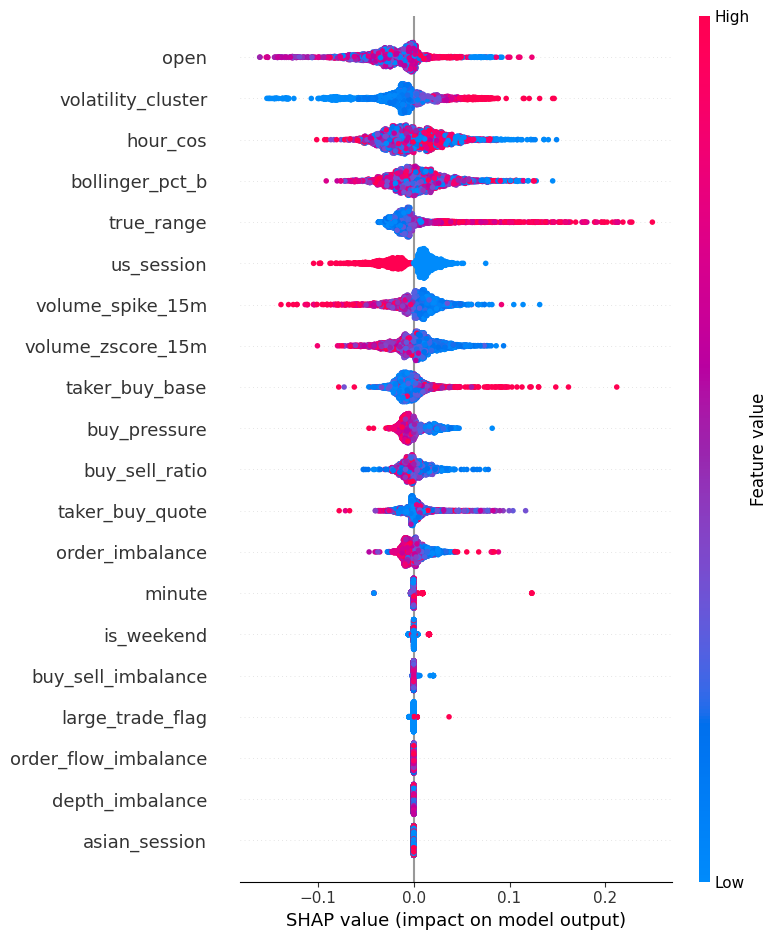


📈 Calculating feature importance...


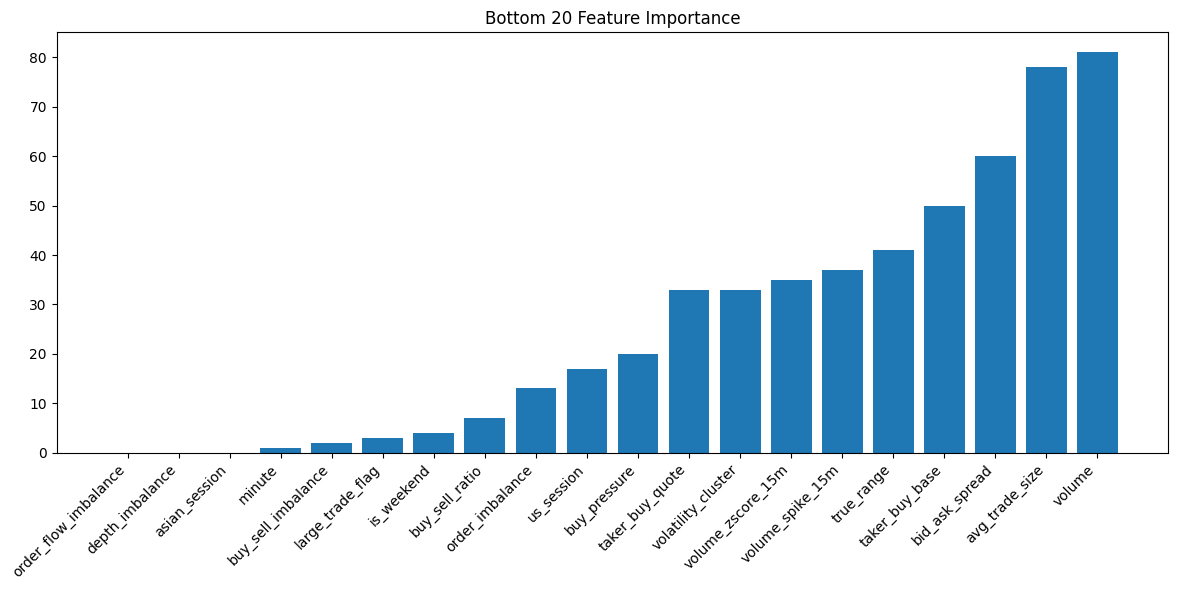

Found existing experiment
Identical result already exists for experiment ID: 25
Logged feature importance for experiment ID: 25


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="15m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="15m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()